100%|██████████| 1100/1100 [00:00<00:00, 4169.40it/s]


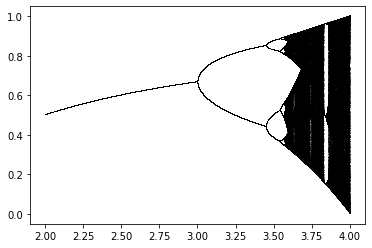

In [5]:
# Logistic分岔图
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

def logisticMap():
  mu = np.arange(2, 4, 0.0001)
  x = 0.2 # 初值
  iters = 1000 # 不进行输出的迭代次数
  last = 100 # 最后画出结果的迭代次数
  for i in tqdm(range(iters+last)):
    x = mu * (1-x) * x
    if i >= iters:
      plt.plot(mu, x, ',k', alpha=0.25) # alpha设置透明度
  plt.show()
  return x

x = logisticMap()

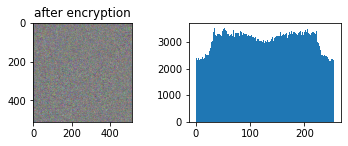

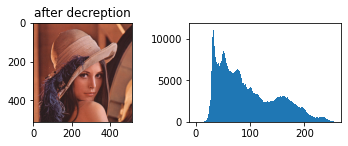

In [30]:
# 基于Logistic混沌序列实现图像的置乱处理，并分析直方信息
import os
from PIL import Image

def logistic_encrypt(image, x, u):
    xsize, ysize = image.size
    image = np.array(image).flatten()
    num = len(image)
    
    # 初始化x 迭代200次以保证充分混沌
    for i in range(200):
        x = u * x * (1-x)
        
    E = np.zeros(num)
    E[0] = x
    for i in range(0,num-1):
        E[i+1] = u * E[i]* (1-E[i])
    E = np.round(E*255).astype(np.uint8)

    image = np.bitwise_xor(E,image)
    image = image.reshape(xsize,ysize,-1)
    image = np.squeeze(image)
    image = Image.fromarray(image)
    
    return image


def img_hist(im):
    im = np.array(im)
    plt.hist(im.flatten(), bins = 256)
    plt.show()
    
x = 0.1
u = 4
path = os.path.join("/root/notebook/lena.bmp")
image = Image.open(path)

im_en = logistic_encrypt(image, x, u)
im_de = logistic_encrypt(im_en, x, u)
plt.subplot(221)
plt.imshow(im_en)
plt.title("after encryption")

plt.subplot(222)
img_hist(im_en)

plt.subplot(223)
plt.imshow(im_de)
plt.title("after decreption")

plt.subplot(224)
img_hist(im_de)

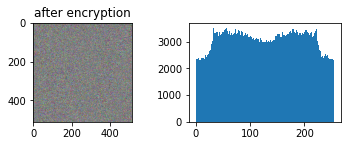

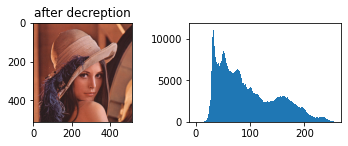

In [29]:
plt.subplot(221)
plt.imshow(im_en)
plt.title("after encryption")

plt.subplot(222)
img_hist(im_en)

plt.subplot(223)
plt.imshow(im_de)
plt.title("after decreption")

plt.subplot(224)
img_hist(im_de)